# Spectra differences

> Can Mid- and Near-infrared spectra reveal increasing concentration of K?

## Import 

In [164]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import fastcore.all as fc
from pathlib import Path
from sklearn.pipeline import Pipeline
import numpy as np

from spik.loading import load_mir, load_nir
from spik.preprocessing import (MeanCenter, MeanReplicates, DWTFiltering, DiffFromUnspiked,
                                wn_to_wl, wl_to_wn)

In [166]:
deep_blue, blue, orange, red = '#0571b0', '#92c5de', '#f4a582', '#ca0020'

## Utils

In [227]:
def plot_spectra(X, wavenumbers, colors, labels, title, 
                 xlabel='Wavenumber ($cm^{-1}$)', ylabel='Absorbance',
                 spectra_type='MIR', figsize=(12, 5), locator=250, lw=1,
                 tight_layout=False):
    
    fig, ax = plt.subplots(figsize=figsize)
    X = X[:, :len(wavenumbers)]
    
    for i in range(X.shape[0]):
        ax.plot(wavenumbers, X[i], color=colors[i], label=labels[i], lw=lw)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(locator))
    ax.grid(True)
    ax.invert_xaxis()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if tight_layout: 
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
       ax.legend()    

In [224]:
def load_data(spectra_type):
    if spectra_type == 'MIR':
        fname = Path('../../_data/mir')
        X, wavenumbers, names = load_mir(fname)        
    else:
        fname = Path('../../_data/nir/2023-12-8 _FT-NIR-K-spiked soil.xlsx')
        X, wavenumbers, names = load_nir(fname)

    return X, wavenumbers, names

## Mean replicates

### MIR

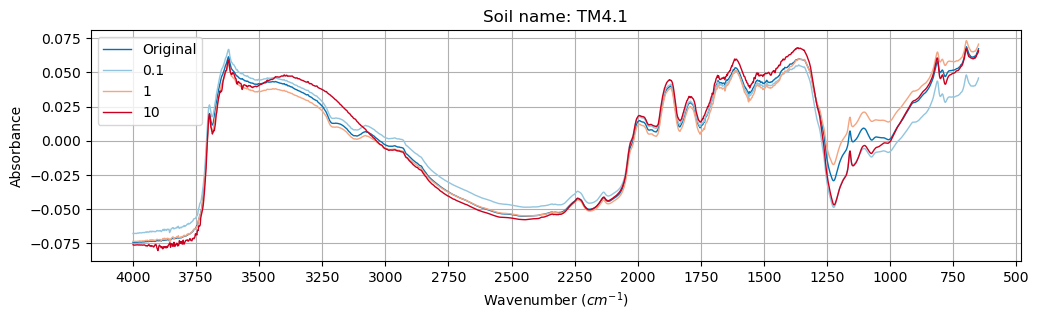

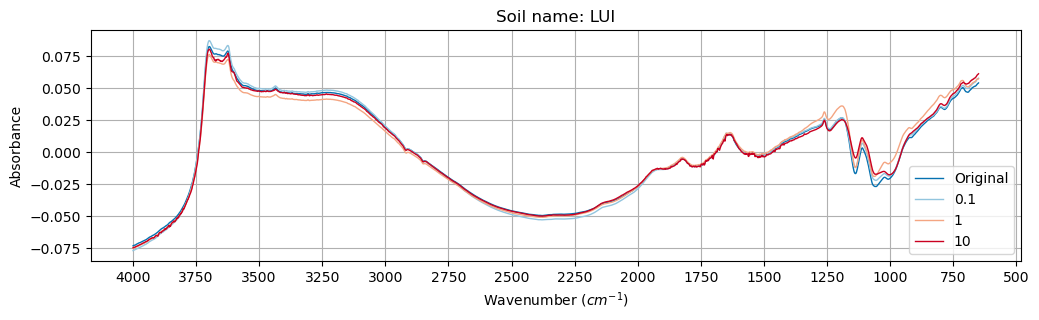

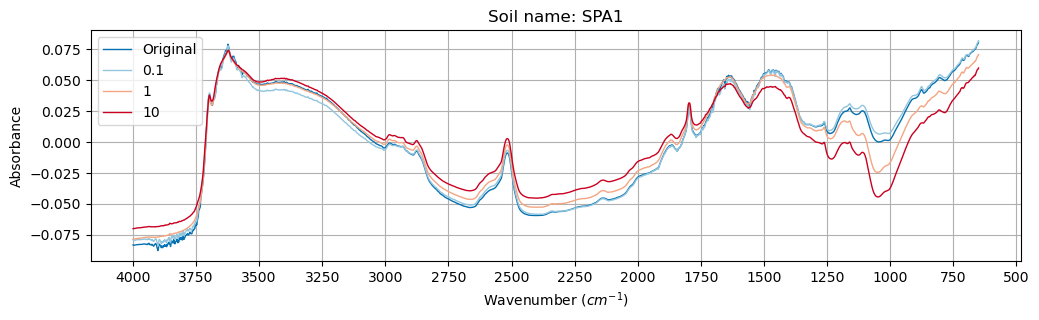

In [225]:
spectra_type = 'MIR'
X, wavenumbers, names = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names))
    ])
    
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'],
                 f'Soil name: {smp_name}', figsize=(12, 3))

### NIR

In [244]:
spectra_type = 'NIR'

X, wavenumbers, names = load_data(spectra_type)
print('X shape: ', X.shape, 'Wavenumbers shape: ', wavenumbers.shape)
print('First 10 wavenumbers: ', wavenumbers[:10])
print('First 5 names: ', names[:5])

X shape:  (24, 949) Wavenumbers shape:  (949,)
First 10 wavenumbers:  [11536 11528 11520 11512 11504 11496 11488 11480 11472 11464]
First 5 names:  ['LUI-0-0' 'LUI-0-1' 'LUI-1-0' 'LUI-1-1' 'LUI-2-0']


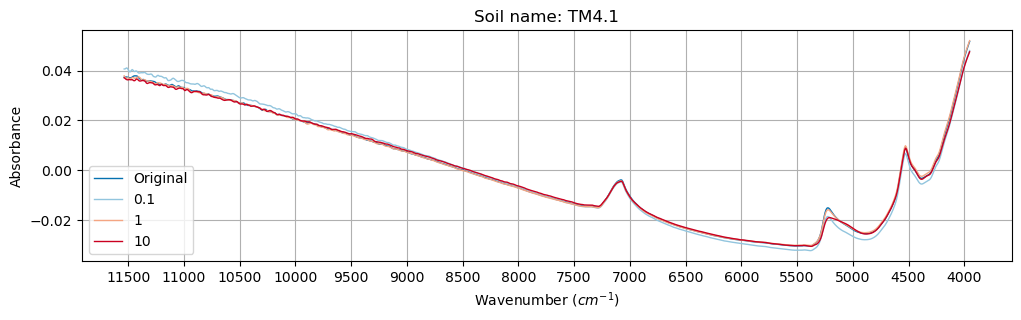

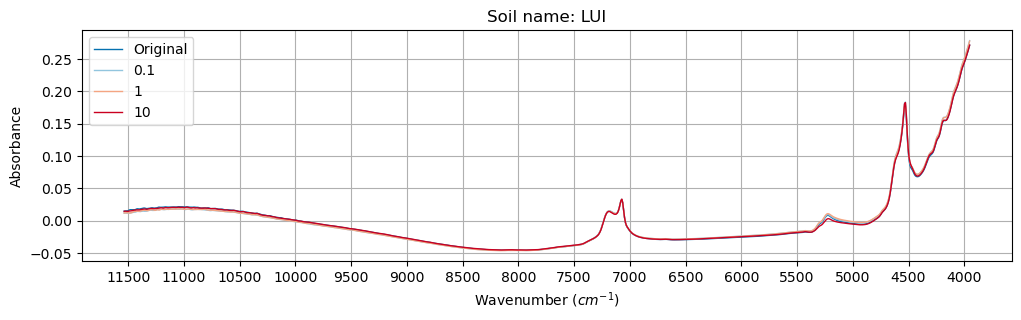

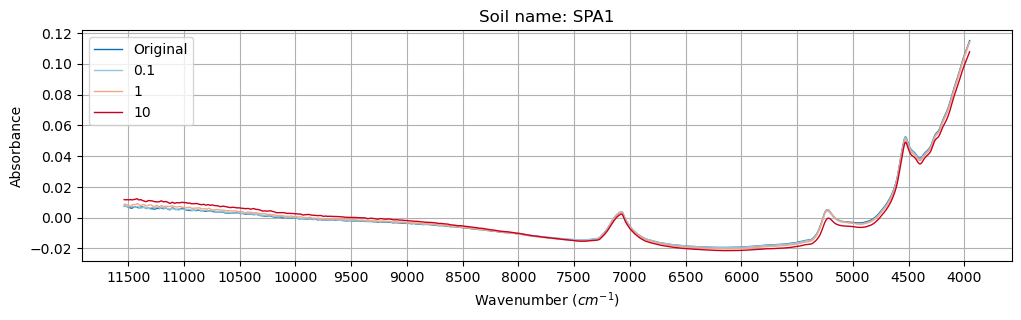

In [245]:
for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names))
    ])
    
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'], 
                 f'Soil name: {smp_name}', figsize=(12, 3), locator=500)

## Mean replicates without baseline & noise

### MIR

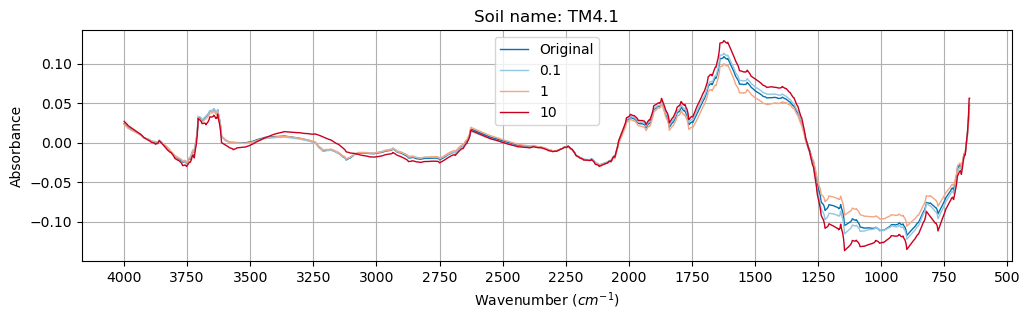

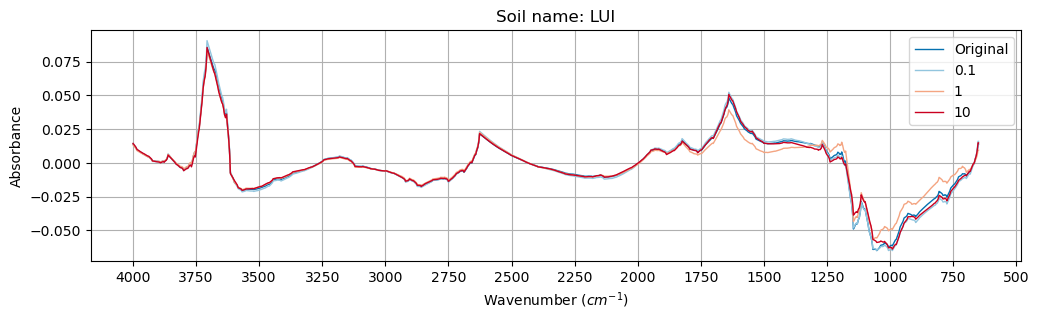

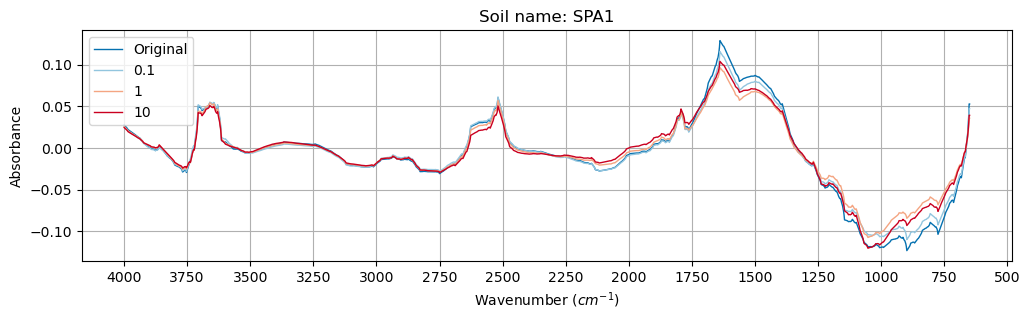

In [176]:
spectra_type = 'MIR'

X, wavenumbers, names = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3]))
    ])
    X_sample = pipe.fit_transform(X)
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'], 
                 f'Soil name: {smp_name}', figsize=(12, 3))

### NIR

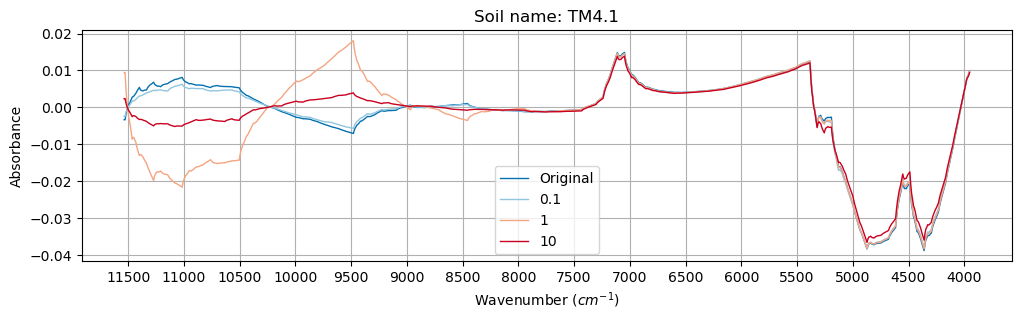

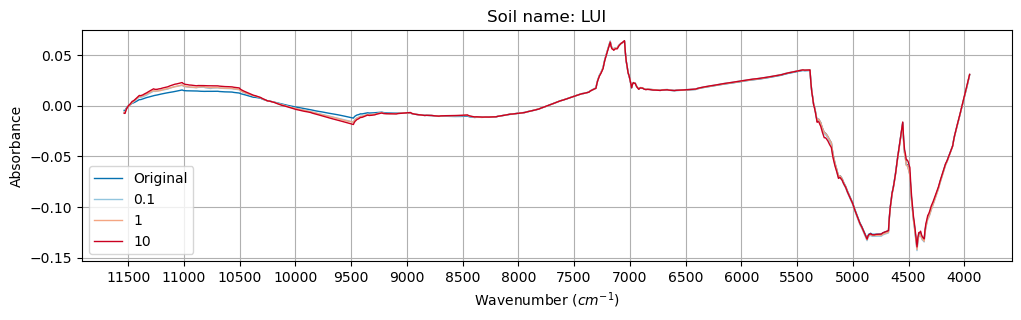

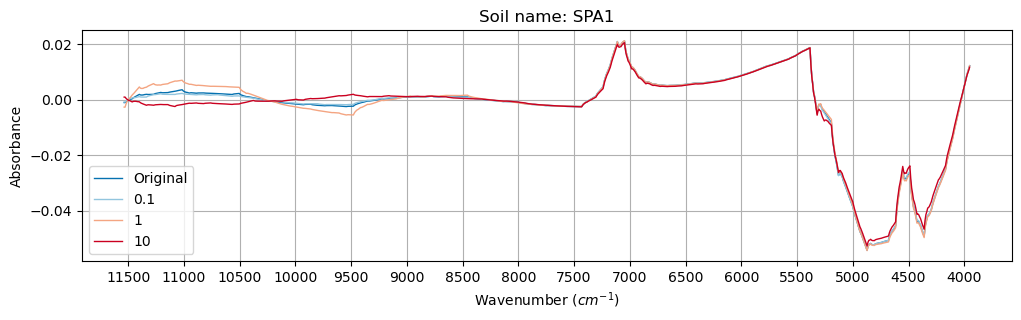

In [177]:
spectra_type = 'NIR'
X, wavenumbers, names = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3]))
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'], 
                 f'Soil name: {smp_name}', figsize=(12, 3), locator=500)

## Differences without baseline and noise

### MIR

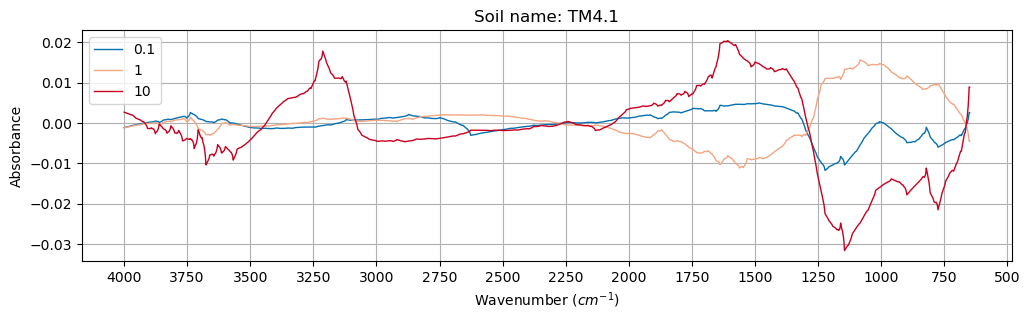

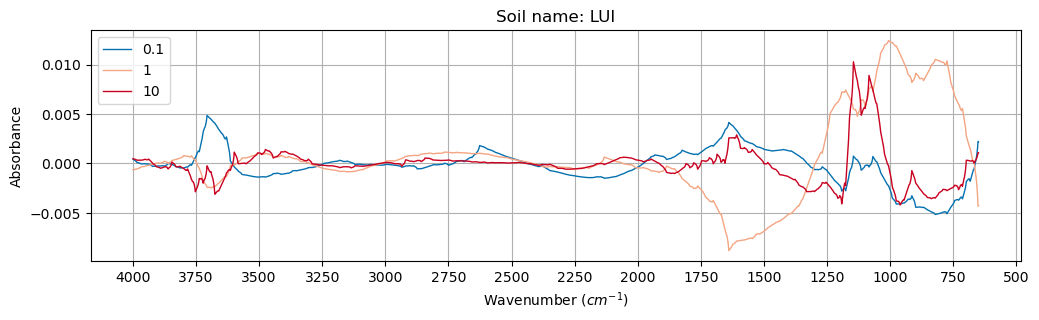

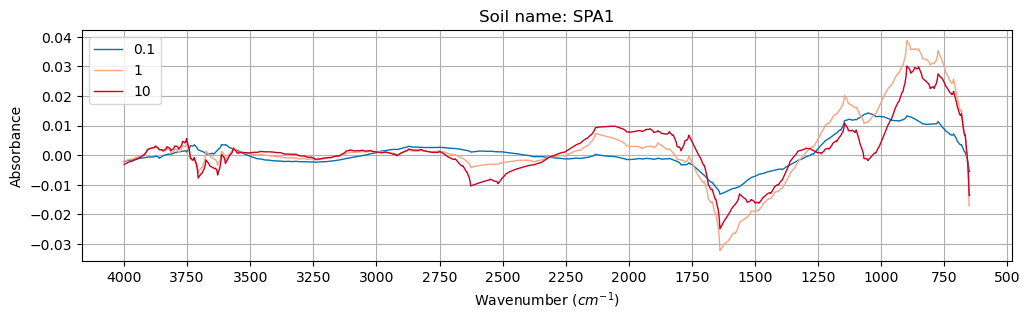

In [178]:
spectra_type = 'MIR'
X, wavenumbers, names = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3])),
        ('Difference from non manipulated soil', DiffFromUnspiked())
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(X_sample, wavenumbers,[deep_blue, orange, red], 
                 ['0.1', '1', '10'], f'Soil name: {smp_name}', figsize=(12,3))

### NIR

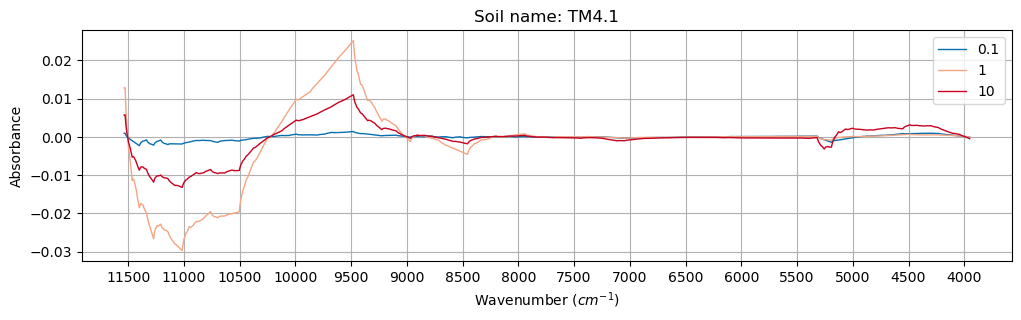

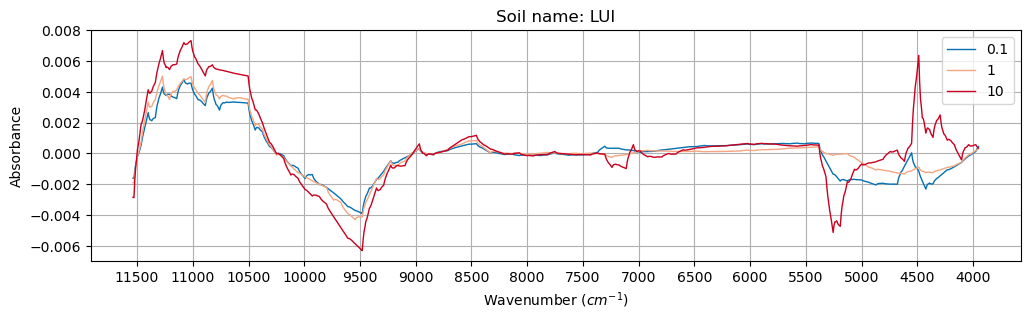

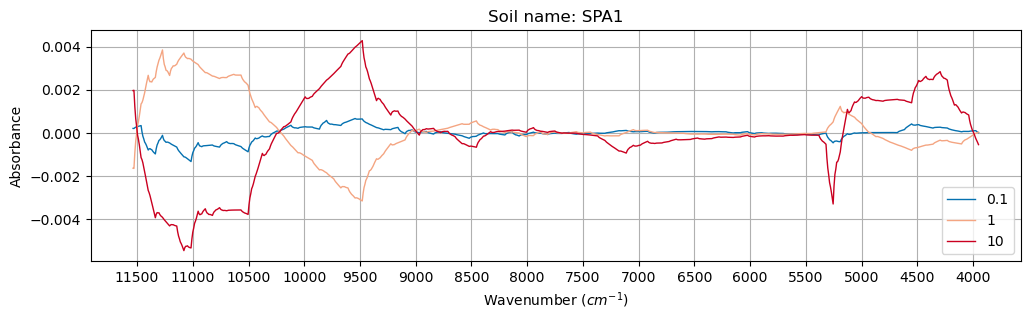

In [179]:
spectra_type = 'NIR'
X, wavenumbers, names = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3])),
        ('Difference from non manipulated soil', DiffFromUnspiked())
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(X_sample, wavenumbers,[deep_blue, orange, red], 
                 ['0.1', '1', '10'], f'Soil name: {smp_name}', figsize=(12,3), locator=500)

## Differences by DWT decomposition level

### MIR

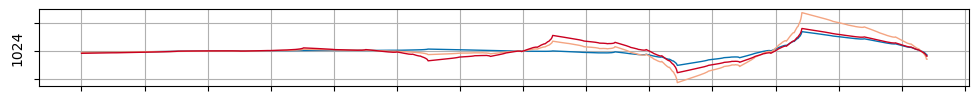

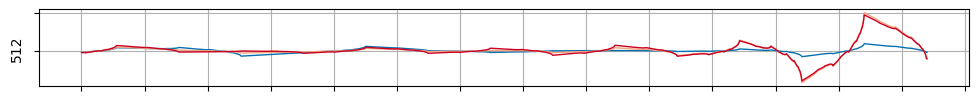

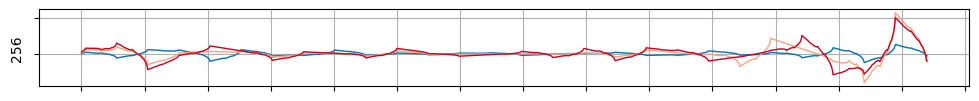

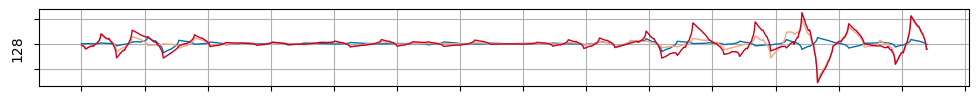

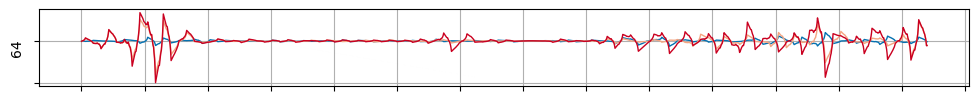

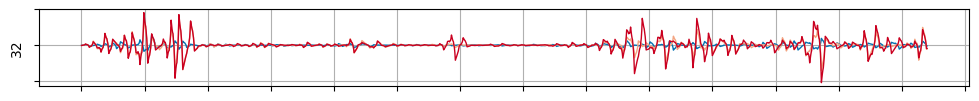

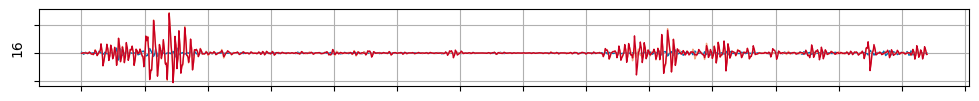

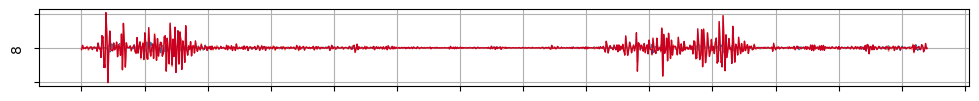

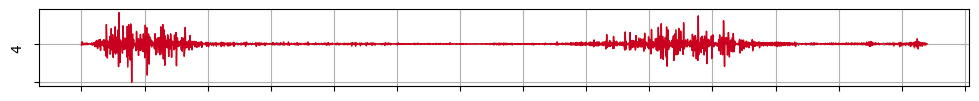

In [237]:
# level = 1
# print(f'wavelet support (in wavenumber): {2*2**(10-level)}')
# filtered_levels = [el for i, el in enumerate(range(10)) if i != level]
# print(f'Filtered levels: {filtered_levels}')

spectra_type = 'MIR'
X, wavenumbers, names = load_data(spectra_type)

smp_name = 'SPA1'
levels = range(1, 10)
for level in levels: 
    filtered_levels = [el for i, el in enumerate(range(10)) if i != level]
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=filtered_levels, verbose=False)),
        ('Difference from non manipulated soil', DiffFromUnspiked())
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(X_sample, wavenumbers,[deep_blue, orange, red], 
                 ['0.1', '1', '10'], 
                 ylabel=f'{2*2**(10-level)}', xlabel='',
                 title='', figsize=(12,1), lw=1, tight_layout=True)

### NIR

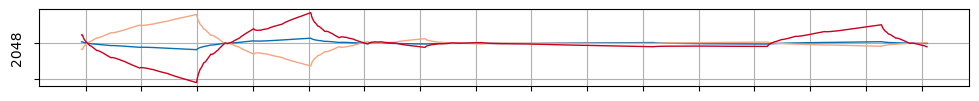

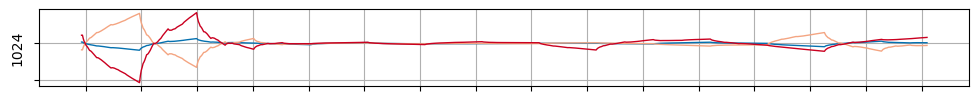

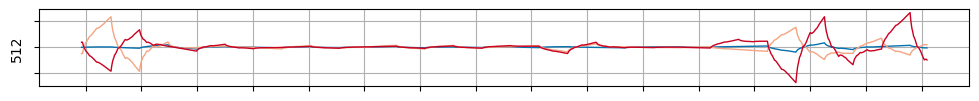

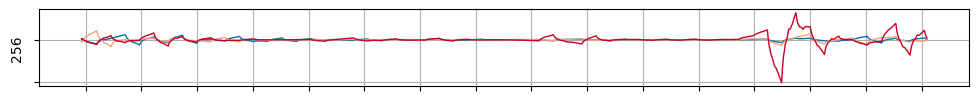

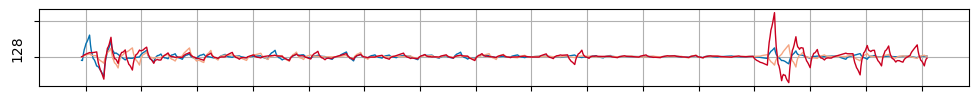

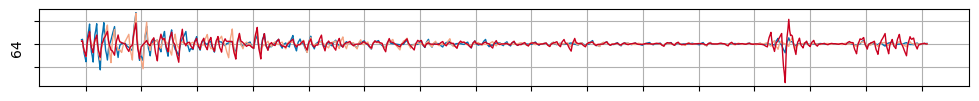

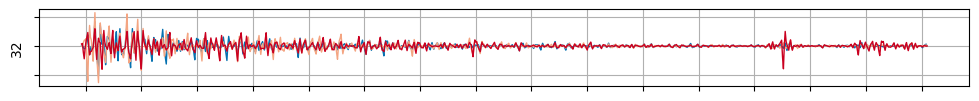

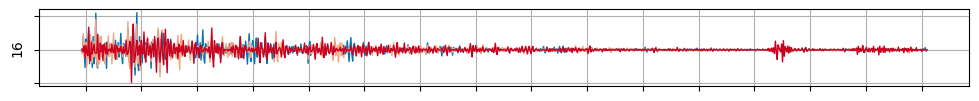

In [262]:
# level = 1
# print(f'wavelet support (in wavenumber): {2*2**(10-level)}')
# filtered_levels = [el for i, el in enumerate(range(10)) if i != level]
# print(f'Filtered levels: {filtered_levels}')

spectra_type = 'NIR'
X, wavenumbers, names = load_data(spectra_type)

smp_name = 'SPA1'
levels = range(1, 9)
for level in levels: 
    # filtered_levels = [el for i, el in enumerate(range(9) if i != level]
    filtered_levels = [el for i, el in enumerate(range(9)) if i != level]
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=filtered_levels, verbose=False)),
        ('Difference from non manipulated soil', DiffFromUnspiked())
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(X_sample, wavenumbers,[deep_blue, orange, red], 
                 ['0.1', '1', '10'], 
                 ylabel=f'{8*2**(9-level)}', xlabel='',
                 title='', figsize=(12,1), lw=1, tight_layout=True, locator=500)

wavelet support (in wavenumber): 256
Filtered levels: [0, 1, 2, 3, 5, 6, 7, 8]


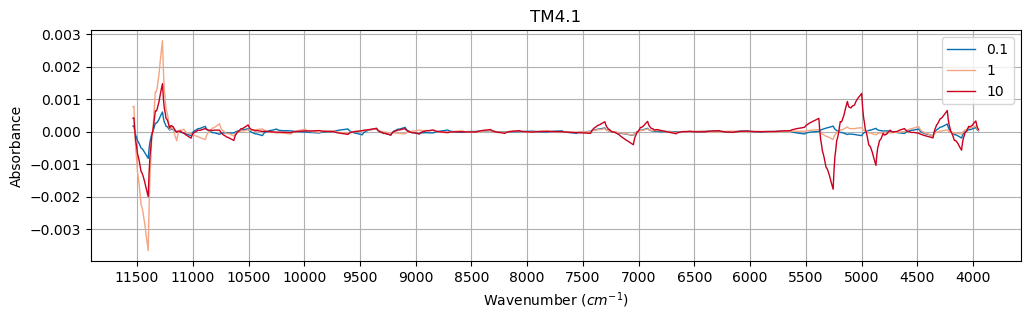

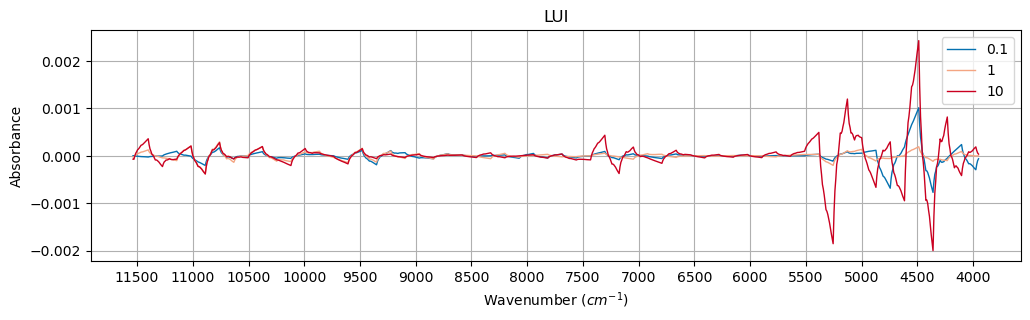

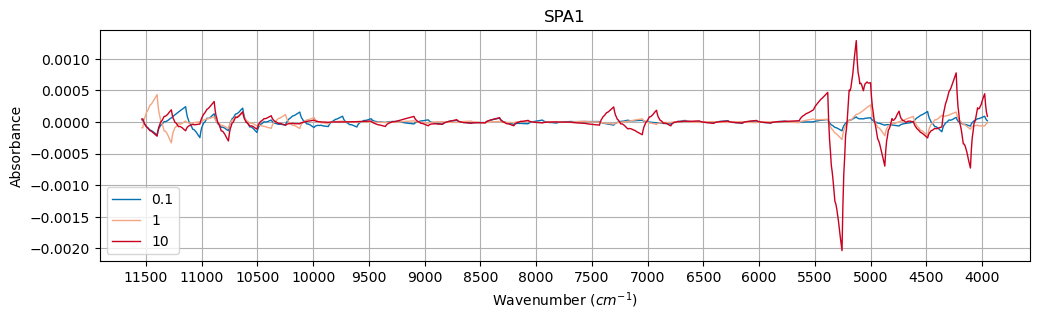

In [258]:
level = 4
print(f'wavelet support (in wavenumber): {8*2**(9-level)}')
filtered_levels = [el for i, el in enumerate(range(9)) if i != level]
print(f'Filtered levels: {filtered_levels}')

spectra_type = 'NIR'
X, wavenumbers, names = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(wavelet='db2', filtered_levels=filtered_levels, verbose=False)),
        ('Difference from non manipulated soil', DiffFromUnspiked())
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(X_sample, wavenumbers,[deep_blue, orange, red], 
                 ['0.1', '1', '10'], smp_name, figsize=(12,3), locator=500, lw=1)

## Wavenumber diagnosis (WIP)

In my paper:
- 3700–3400 cm−1: albinet et al. 2022,Viscarra Rossel et al., 2006; Le Guillou et al., 2015). absorption peaks of soil constituents such as calcite, kaolinite, 2:1 type clay minerals, and the features of free water
- 1200–970 cm−1: assigned to Si–O stretching (Farmer, 1974)
- 3000–2800 cm−1 spectral region (Le Guillou et al., 2015).  high organic matter content such as Histosols, Gelisols and Andisols

Based on plots.

MIR:
- 1500-1250: (smectite: Rossel et al. 2006)
- 1250-1000:
- 4000-3500: kaolinite

NIR:
- 4000-5000: O-H bonds, in lattice minerals, Kaolinite
- 5000-5500: O-H bonds
- 7000-7500: O-H bonds, Kaolinite
- 10500-11500:

In [400]:
wn_to_wl(1500)

6666.666666666667

In [404]:
wl_to_wn(2400)

4166.666666666667